In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

import pandas as pd
import numpy as np
import sys

import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

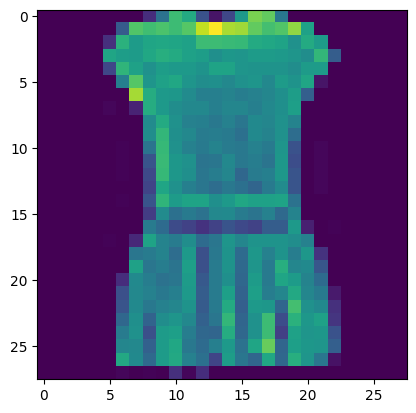

In [3]:
plt.imshow(x_train[3])

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train_ohe=to_categorical(y_train)
y_test_ohe=to_categorical(y_test)

In [9]:
y_train_ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
x_train_rs=x_train.reshape(60000,28,28,1).astype('float32')
x_test_rs=x_test.reshape(10000,28,28,1).astype('float32')

In [8]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,activation='relu',kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(48,activation='relu'))
model.add(Dropout(0,2))
model.add(Dense(30,activation='relu'))
model.add(Dropout(0,2))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │        76,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,470 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,800 (382.03 KB)

 Trainable params: 97,800 (382.03 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_dir = './model/'
if not os.path.exists(model_dir):
  os.mkdir(model_dir)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.keras'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [25]:
hist = model.fit(x_train_rs, y_train_ohe, validation_data=(x_test_rs, y_test_ohe), epochs=100, batch_size=200,callbacks=[early_stopping_callback, checkpoint])

Epoch 1/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.5698 - loss: 1.8649 - val_accuracy: 0.8316 - val_loss: 0.4848
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8478 - loss: 0.4350 - val_accuracy: 0.8703 - val_loss: 0.3745
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8800 - loss: 0.3374 - val_accuracy: 0.8766 - val_loss: 0.3425
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.8919 - loss: 0.2951 - val_accuracy: 0.8616 - val_loss: 0.3757
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.8991 - loss: 0.2749 - val_accuracy: 0.8831 - val_loss: 0.3257
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9073 - loss: 0.2508 - val_accuracy: 0.8898 - val_loss: 0.3124
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9137 - loss: 0.2308 - val_accuracy: 0.8888 - val_loss: 0.3100
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9172 - loss: 0

In [26]:
model.evaluate(x_test,y_test_ohe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9056 - loss: 0.3181


[0.31252121925354004, 0.9041000008583069]

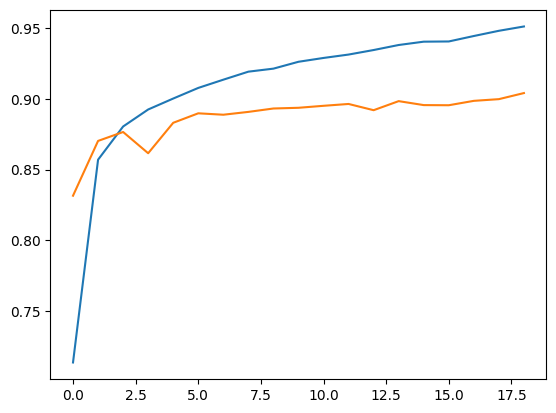

In [27]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [29]:
label=['T-shirt/top',
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle boot']

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


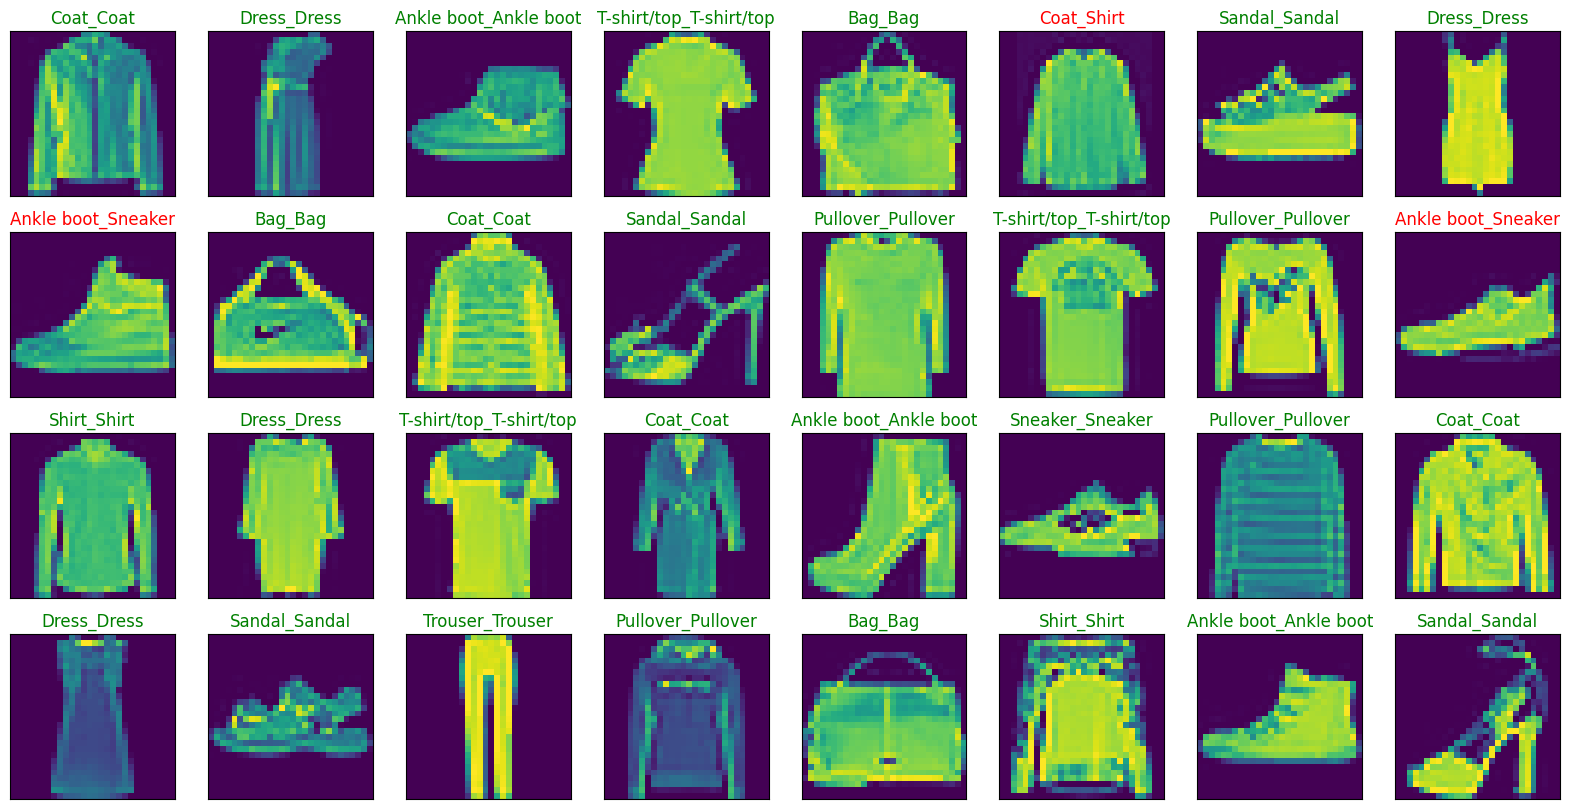

In [32]:
pred = model.predict(x_test)

fig = plt.figure(figsize=(20, 10))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)): # 10000개중 random하게 36개 추출
    ax = fig.add_subplot(4, 8, i+1, xticks=[], yticks=[]) # 도화지를 4행 8열로 나눔
    ax.imshow(x_test[idx])

    pred_idx = np.argmax(pred[idx]) # 모델이 예측한 idx값
    real_idx = np.argmax(y_test_ohe[idx]) # 실제 정답 idx

    ax.set_title('{}_{}'.format(label[pred_idx], label[real_idx]), color='green' if pred_idx == real_idx else 'red')